# Introduction

Attending to Colleg undoubtedly have an impact on people´s lives, <br>
also those people that went to college make an impact of their own <br>
on others persons, communities and workplace.

I want to know if going to college makes a difference in Baseball players, <br>
their teams and their income as professional players.<br>
These are the questions I want to answer with this analysis:

    1. On a yearly basis, does Baseball players who attended to college have greater income compared to those who didn't?

    2. Having College graduated player gives teams better chance to win World Series?

    3. Having more College graduated players makes teams more successful during the season?
    
### Independet Variable
 Players who attended to college
 
### Dependent Variables
    1. Income of players
    2. Chance of winning World Series
    3. Performance of the teams


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#Loads important files for this analysis

filename = 'baseballdatabank-2017.1\core\Teams.csv'
teams_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Salaries.csv'
salaries_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Master.csv'
master_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\CollegePlaying.csv'
college_df = pd.read_csv(filename)

filename = 'baseballdatabank-2017.1\core\Appearances.csv'
appearances_df = pd.read_csv(filename)


In [7]:
#In the master table get those players who went to college or not

went = college_df.playerID.unique()

#append the new column to the original dataFrame
master_df['went_to_college'] = master_df.playerID.isin(went)

#master_df[['playerID','went_to_college']].head()



In [8]:
#get players who attended to college and those who didn't
college_playing = master_df[master_df['went_to_college']]
non_college_playing = master_df[master_df['went_to_college']==False]


In [10]:
#now get the salaries of the players to describe and compare
#create an index dataFrame of the ssalaries table to splti the table
#no need to append this column to that table
salaries_df['went_to_college'] = salaries_df.playerID.isin(went)

college_player_salaries = salaries_df[salaries_df['went_to_college']]
non_college_player_salaries = salaries_df[salaries_df['went_to_college']==False]



In [11]:

college_salaries2016 = college_player_salaries[college_player_salaries.yearID==2016]
non_college_salaries2016 =  non_college_player_salaries[non_college_player_salaries.yearID==2016]

college_salaries2015 = college_player_salaries[college_player_salaries.yearID==2015]
non_college_salaries2015 =  non_college_player_salaries[non_college_player_salaries.yearID==2015]

college_salaries2014 = college_player_salaries[college_player_salaries.yearID==2014]
non_college_salaries2014 =  non_college_player_salaries[non_college_player_salaries.yearID==2014]




In [ ]:
def put_salaries_hist(row, col, df, axes, lbl):
    xlabel = '{0}College Players Income x10 Million Dollars\n avg: {1:.2f} Million Dollars'
    
    meanmd = ad.salary.values.mean() /1000000
    axes[ax,0].set_xlabel(xlabel.format(lbl, meanmd))
    axes[ax,0].hist(adf.salary.values)
    axes[ax,0].axvline(adf.salary.values.mean(), color='c', linestyle='dashed', linewidth=2)
    

Populating the interactive namespace from numpy and matplotlib


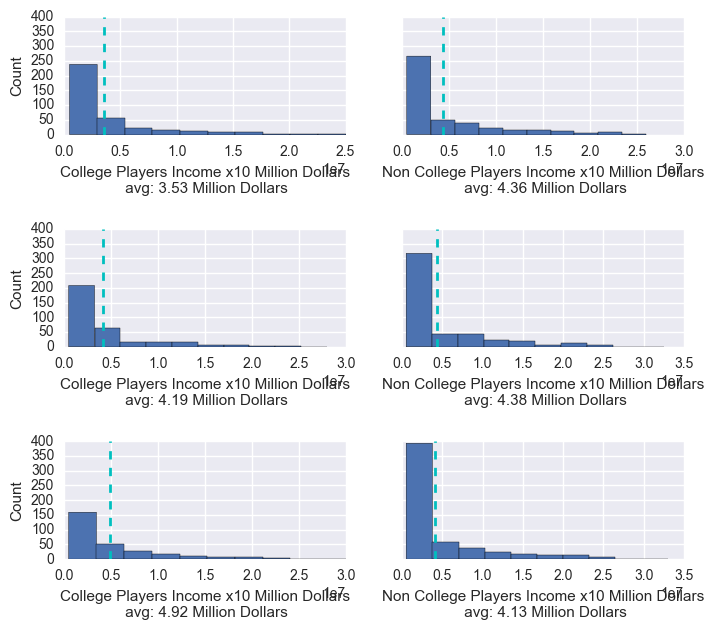

In [12]:
%pylab inline

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 7), sharey=True,sharex=False)

#put the resulting DataFrames into lists to easily get the charts
alist = [college_salaries2014 , college_salaries2015, college_salaries2016]
blist = [non_college_salaries2014 , non_college_salaries2015, non_college_salaries2016]
#row counter 
ax = 0

#string to put label on each chart


for ax in range( len(alist)):
    #the figure has 2 columns, the column on the left has the colleger players data
    # the column on the right has the non college players data
    axes[ax,0].set_ylabel('Count')
    
    #get a data frame
    
    
    adf = alist[ax]
    put_salaries_hist(ax,0,adf,axes,'')
    
    adf = blist[ax]
    put_salaries_hist(ax,0,adf,axes,'Non')

    ax = ax + 1


fig.subplots_adjust(hspace = 0.8)

### At first glance
In the above graphics, we can see an increase in the average income,<br>
of the group of player who attended to college, but in that same window of time,<br>
those players who did not attend college had a better average income at first<br> 
and then in the year 2016, college players were better paid.

Another thing to notice is that in the group of players that did not attend to college<br>
there are considerably more players with income of fewer than 5 million dollars.

### What is the real tendency?
Let's find out plotting the mean for both groups over the years. Unfortunately, <br>
we can only plot this since the first year salaries were recorded.

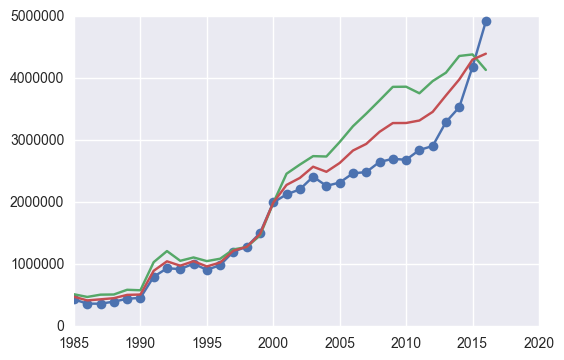

In [219]:
clgmeans  = college_player_salaries.groupby('yearID').salary.mean()
nclgmeans = non_college_player_salaries.groupby('yearID').salary.mean()
allmean   =  salaries_df.groupby('yearID').salary.mean()


l1 = plt.plot(clgmeans,label='College', marker='o')
l2 = plt.plot(nclgmeans, label='Non College')
l3 = plt.plot(allmean, label='All', marker='+')



# 1. On a yearly basis, does Baseball players who attended to college have greater income compared to those who didn't?
<br>
## Means income Results
The line in green represents players who did not attend college. <br>
The blue line with dots is mean income of players who attended college.<br>
The red line is the average income of all players.

Apparently going to college may not guaranty a better income,<br> 
until recent years those trends have been switching.

But something may be wrong with this analysis, <br>
I have not taken into account the effect of the outliers and the size of the groups. 

# In conclusion

I cannot gurantee that attending to college may give players <br>
a better chance to get a better income.

===================================================================================================================

# Having college player give teams better chance to win the World Series?

Now it is time to find out if those teams with more college players <br>
have won more World Series compared to those with fewer or no college players

In [220]:
def count_college_players(df):
    
    newdf = df
    
    #create a new column to count the number of players who attended college
    plc = {'college_player_count':[0.0]*len(newdf.index)}
    cpc = pd.DataFrame(plc,index=newdf.index)

    for index, row in newdf.iterrows():
        teamID = row['teamID']
        yearID = row['yearID']

        #get only the players appearences of that team, that year
        yrteampls = appearances_df[appearances_df['yearID']==yearID]
        yrteampls = yrteampls[ yrteampls['teamID']==teamID]

        #now get the college players attending college on or before that year
        clgplyr = college_df[college_df['yearID']<=yearID]

        #by merging these two DataFrames where the  player should be present on both 'tables'
        #I can get the count of college pleyers for that team and year
        merged = yrteampls.merge(clgplyr,
                               on=['playerID'],
                               how='inner')

        cpc.loc[index]['college_player_count'] = len(merged)
        
        
    #append the new column to the dataFrame
    newdf = newdf.assign(college_player_count=cpc)
    
    return newdf
    

In [221]:
#get only winners of the world series?
winners = teams_df[teams_df.WSWin=='Y']
not_winners = teams_df[teams_df.WSWin=='N']

#now we need the table of appearances to match and count how mamy college players each winner team had that year

winnners_clg_plyrs = count_college_players(winners)
not_winnners_clg_plyrs = count_college_players(not_winners)

winnners_clg_plyrs = winnners_clg_plyrs.sort_values('yearID')
not_winnners_clg_plyrs = not_winnners_clg_plyrs.sort_values('yearID')


<Container object of 2361 artists>

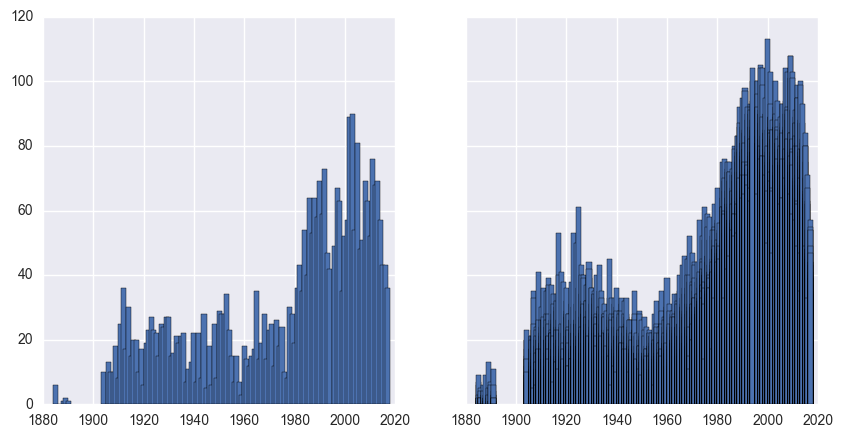

In [222]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

axes[0].bar(winnners_clg_plyrs['yearID'].values,
      winnners_clg_plyrs['college_player_count'].values,
      width=2)


axes[1].bar(not_winnners_clg_plyrs['yearID'].values,
      not_winnners_clg_plyrs['college_player_count'].values,
      width=2)


# 2. Having College graduated player gives teams better chance to win World Series?

The comparison of both charts (winner of World Series at the left chart),<br> 
may tell us that having more college player does not appear to be an advantage. <br>
In the chart of the right (not winners by year), we appreciate a lot more college players<br>
compared to the winning teams.

<Container object of 218 artists>

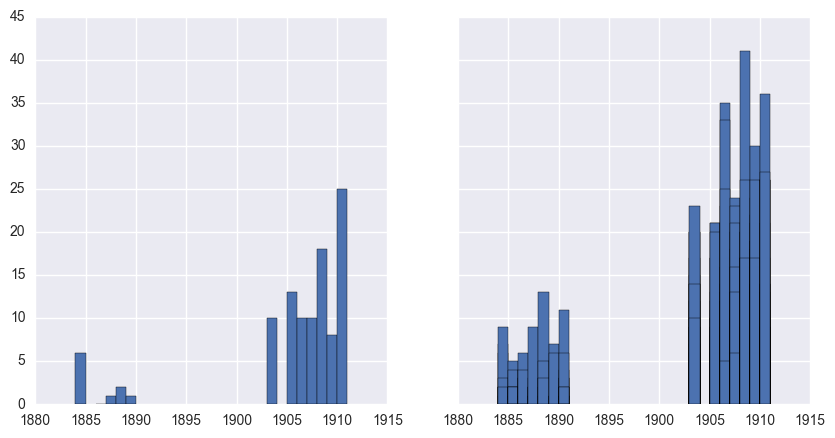

In [223]:
winnners_clg_plyrs_b1910 = winnners_clg_plyrs[winnners_clg_plyrs['yearID']<=1910]
not_winnners_clg_plyrs_b1910 = not_winnners_clg_plyrs[not_winnners_clg_plyrs['yearID']<=1910]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

axes[0].bar(winnners_clg_plyrs_b1910['yearID'].values,
      winnners_clg_plyrs_b1910['college_player_count'].values,
      width=1)


axes[1].bar(not_winnners_clg_plyrs_b1910['yearID'].values,
      not_winnners_clg_plyrs_b1910['college_player_count'].values,
      width=1)



<Container object of 361 artists>

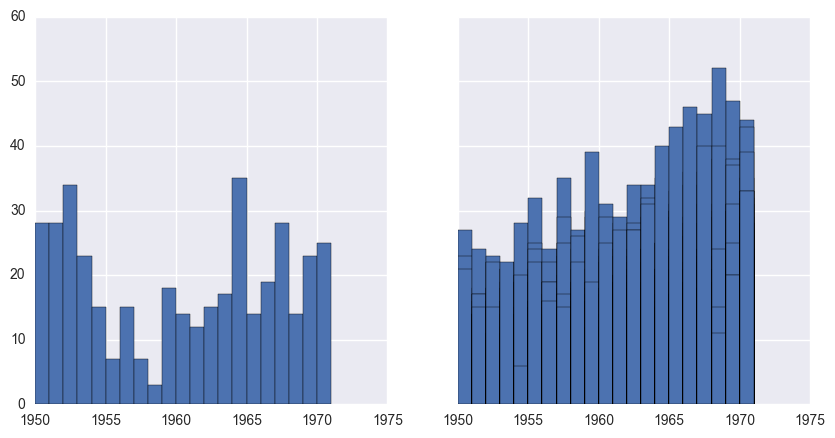

In [276]:
winnners_clg_plyrs_50_70 = winnners_clg_plyrs[winnners_clg_plyrs['yearID']>=1950]
winnners_clg_plyrs_50_70 = winnners_clg_plyrs_50_70[winnners_clg_plyrs_50_70['yearID']<=1970]

not_winnners_clg_plyrs_50_70 = not_winnners_clg_plyrs[not_winnners_clg_plyrs['yearID']>=1950]
not_winnners_clg_plyrs_50_70 = not_winnners_clg_plyrs_50_70[not_winnners_clg_plyrs_50_70['yearID']<=1970]


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), sharey=True,sharex=False)

axes[0].bar(winnners_clg_plyrs_50_70['yearID'].values,
      winnners_clg_plyrs_50_70['college_player_count'].values,
      width=1)


axes[1].bar(not_winnners_clg_plyrs_50_70['yearID'].values,
      not_winnners_clg_plyrs_50_70['college_player_count'].values,
      width=1)



There are some interesting spots in the charts, there are gaps between <br>
1890 and 1904, approximately, also there are lapses with some decrease <br>
in the number of college players, most notably between 1950 and 1970. <br>
I assume this was caused by historical events like the great depression, <br>
World war I and the Vietnam War, in the latest large numbers of young men where deployed on war. 


=================================================================================================

# 3. Does having more College graduated players  makes teams more successful during the season?


By this I focus on the number of games won up to the split season, <br>
obviously excluding post season games. I want to discover if there is a<br>
correlation between the number of college players in each team and the number of won games.

In [236]:
#just as with the previous section, let us count the number of college players
#and append a new column to the TeamsHalf Dataframe

teams_clgplr = count_college_players(teams_df)

teams_clgplr = teams_clgplr.sort_values(by='yearID', ascending=False)



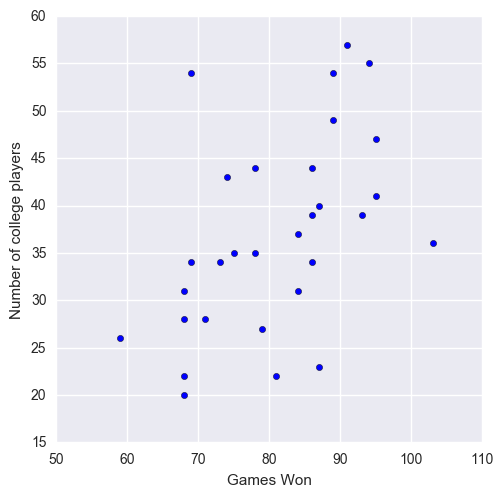

In [289]:

teams_clgplr2016 = teams_clgplr[teams_clgplr['yearID']==2016]


x = teams_clgplr2016.W.values
y = teams_clgplr2016.college_player_count.values


fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

axScatter.scatter(x,y,label='a label')
axScatter.set_xlabel('Games Won')
axScatter.set_ylabel('Number of college players')






In this case for year 2016, those teams with more college students <br>
hava won more games.
Lets find out how does it look for the last 20 years

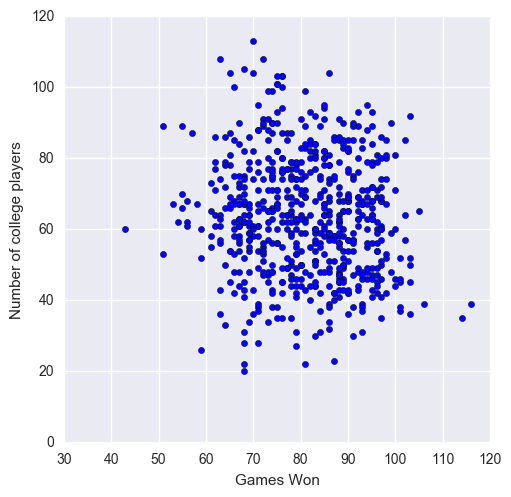

In [291]:

teams_clgplr20yrs = teams_clgplr[teams_clgplr['yearID']>=(2016-20)]

x = teams_clgplr20yrs.W.values
y = teams_clgplr20yrs.college_player_count.values

fig, axScatter = plt.subplots(figsize=(5.5, 5.5))

axScatter.scatter(x,y,label='a label')
axScatter.set_xlabel('Games Won')
axScatter.set_ylabel('Number of college players')


# Final Conclusion

At least from what can be appreciated in the scatter plot, <br>
not all the teams with more college players have better performance. <br>
Again from the last year, that tendency appears to be changing.

Independently of the results of these very simplistic analyses, <br>
playing in college is a major entry point to the major league, <br>
further analysis could demonstrate that some college graduated players <br>
are responsible for the change in the tendency of the results.